<a href="https://colab.research.google.com/github/kaziwahidaltaher-droid/.github/blob/main/notebooks/Getting_started_with_google_colab_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Colab is making it easier than ever to integrate powerful Generative AI capabilities into your projects. We are launching public preview for a simple and intuitive Python library (google.colab.ai) to access state-of-the-art language models directly within Pro and Pro+ subscriber Colab environments.  This means subscribers can spend less time on configuration and set up and more time bringing their ideas to life. With just a few lines of code, you can now perform a variety of tasks:
- Generate text
- Translate languages
- Write creative content
- Categorize text

Happy Coding!


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Getting_started_with_google_colab_ai.ipynb)

In [39]:
# @title List available models
from google.colab import ai

ai.list_models()

['google/gemini-2.5-flash', 'google/gemini-2.5-flash-lite']

Choosing a Model
The model names give you a hint about their capabilities and intended use:

Pro: These are the most capable models, ideal for complex reasoning, creative tasks, and detailed analysis.

Flash: These models are optimized for high speed and efficiency, making them great for summarization, chat applications, and tasks requiring rapid responses.

Gemma: These are lightweight, open-weight models suitable for a variety of text generation tasks and are great for experimentation.

In [42]:
# @title Simple batch generation example
# Only text-to-text input/output is supported
from google.colab import ai

response = ai.generate_text("What is the capital of France?")
print(response)

APIStatusError: Error code: 402 - {'message': 'Colab Models is only available to Colab Pro and Pro+ subscribers.', 'type': 'invalid_request_error'}

## Update features for modeling

### Subtask:
Select the updated set of features (including the new ones) for training the model.

## Apply Transformations to Skewed Features

### Subtask:
Apply log transformation to skewed numerical features identified during exploration.

**Reasoning**:
Apply log transformation to 'total_rooms' and 'median_income' to reduce skewness and display the head of the DataFrame to show the transformed columns.

In [76]:
import numpy as np

# Apply log transformation to 'total_rooms' and 'median_income'
# Add a small constant (e.g., 1) before taking the log to handle potential zero values,
# although based on describe() output, these columns don't have zeros.
# Using np.log1p which calculates log(1+x) is a robust way to handle this.
df['total_rooms_log'] = np.log1p(df['total_rooms'])
df['median_income_log'] = np.log1p(df['median_income'])

# Display the head of the DataFrame to verify the new transformed columns
display(df.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,total_rooms_log,median_income_log
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,11.889831,0.228617,2.150424,8.632841,0.913727
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,16.522678,0.248497,2.438445,8.942592,1.036737
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,6.153846,0.241667,2.846154,6.580639,0.974899
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,6.641593,0.224517,2.278761,7.314553,1.433106
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,5.549618,0.224209,2.381679,7.282761,1.073294


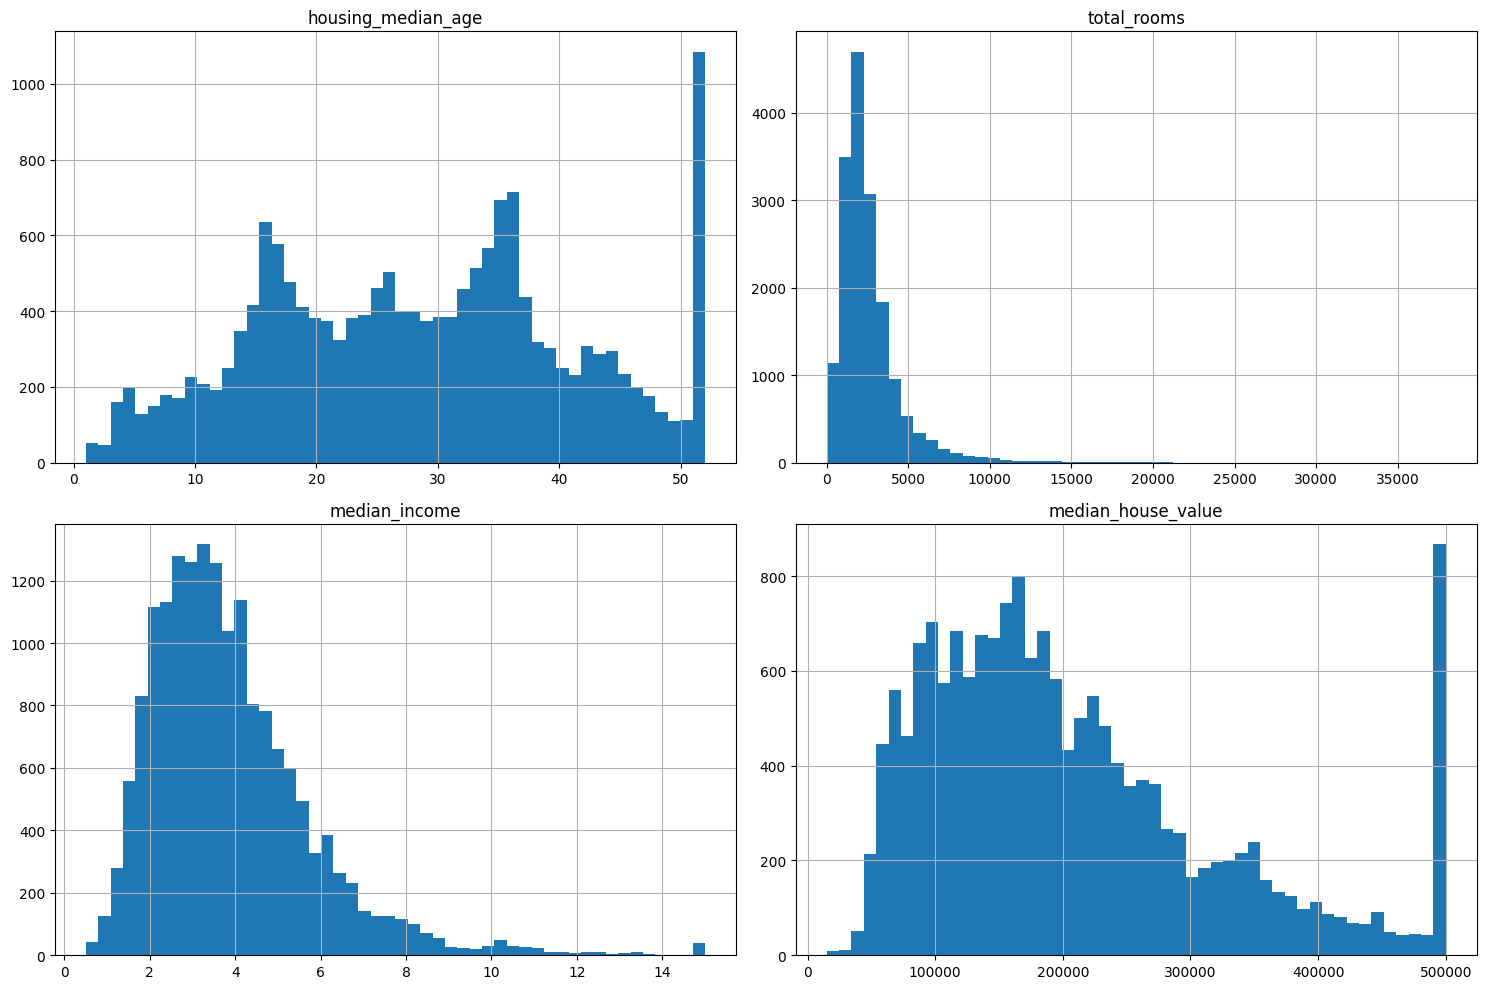

In [75]:
import matplotlib.pyplot as plt
import pandas as pd

# Select a few numerical features to visualize
features_to_visualize = ['housing_median_age', 'total_rooms', 'median_income', 'median_house_value']

# Create histograms for each selected feature
df[features_to_visualize].hist(bins=50, figsize=(15, 10))
plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

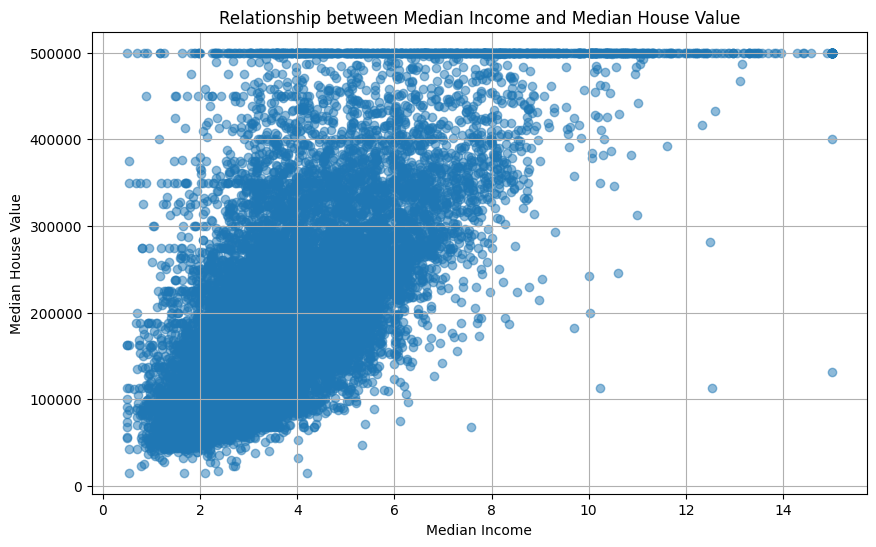

In [74]:
import matplotlib.pyplot as plt

# Create a scatter plot of median_income vs. median_house_value
plt.figure(figsize=(10, 6))
plt.scatter(df['median_income'], df['median_house_value'], alpha=0.5)

# Add labels and title
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Relationship between Median Income and Median House Value')

# Add a grid for better readability
plt.grid(True)

# Show the plot
plt.show()

## Split the data (if necessary)

### Subtask:
Split the updated dataset (`X_engineered`, `y`) into training and testing sets.

**Reasoning**:
Split the features and target into training and testing sets using train_test_split as instructed and print their shapes.

In [73]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train_engineered, X_test_engineered, y_train_engineered, y_test_engineered = train_test_split(X_engineered, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print(f"Shape of X_train_engineered: {X_train_engineered.shape}")
print(f"Shape of X_test_engineered: {X_test_engineered.shape}")
print(f"Shape of y_train_engineered: {y_train_engineered.shape}")
print(f"Shape of y_test_engineered: {y_test_engineered.shape}")

Shape of X_train_engineered: (13600, 11)
Shape of X_test_engineered: (3400, 11)
Shape of y_train_engineered: (13600,)
Shape of y_test_engineered: (3400,)


**Reasoning**:
Select the updated set of features for training the model, including the engineered features.

In [72]:
# Define the list of features, including the original and engineered ones
features_engineered = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                       'total_bedrooms', 'population', 'households', 'median_income',
                       'rooms_per_household', 'bedrooms_per_room', 'population_per_household']

# Create a new DataFrame X_engineered by selecting these columns from df
X_engineered = df[features_engineered]

# Keep the target variable y as it is (the 'median_house_value' column from df)
# y was already defined in a previous step as df['median_house_value']

# Print the head of X_engineered and y to verify
print("Head of X_engineered:")
display(X_engineered.head())

print("\nHead of y:")
display(y.head())

Head of X_engineered:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,11.889831,0.228617,2.150424
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,16.522678,0.248497,2.438445
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,6.153846,0.241667,2.846154
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,6.641593,0.224517,2.278761
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,5.549618,0.224209,2.381679



Head of y:


,median_house_value
0,66900.0
1,80100.0
2,85700.0
3,73400.0
4,65500.0


## Identify potential new features

### Subtask:
Determine which existing features can be combined or transformed to create meaningful new features (e.g., ratios, polynomial features, interaction terms).

**Reasoning**:
Describe the rationale for choosing features to create based on the analysis of existing features and potential relationships.

In [70]:
# Rationale for choosing new features:
# Based on domain knowledge and common practices in housing price prediction,
# ratios of existing features can provide more meaningful insights into the
# characteristics of a housing block group than the raw counts alone.

# 1. Rooms per household ('rooms_per_household'):
#    This ratio (total_rooms / households) can indicate the average number of rooms
#    available per household in a block group. It might be a strong predictor
#    of housing value, as larger houses (more rooms per household) are often
#    associated with higher values.

# 2. Bedrooms per room ('bedrooms_per_room'):
#    This ratio (total_bedrooms / total_rooms) can provide an idea of the
#    proportion of rooms that are bedrooms. A higher ratio might indicate
#    a different type of housing stock which could influence the median house value.

# 3. Population per household ('population_per_household'):
#    This ratio (population / households) represents the average household size.
#    Larger household sizes in a block group might correlate with different housing
#    demands and potentially impact housing values.

# These ratios normalize the counts by the number of households or rooms,
# making them potentially more robust indicators than the raw counts themselves.

## Create new features

### Subtask:
Write code to generate the new features and add them to the DataFrame.

**Reasoning**:
Generate the new features by calculating the ratios as described in the instructions and add them as new columns to the DataFrame. Then, display the head of the updated DataFrame to confirm the changes.

In [71]:
# Calculate 'rooms_per_household' and add it as a new column
df['rooms_per_household'] = df['total_rooms'] / df['households']

# Calculate 'bedrooms_per_room' and add it as a new column
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']

# Calculate 'population_per_household' and add it as a new column
df['population_per_household'] = df['population'] / df['households']

# Display the head of the DataFrame to verify the new columns
display(df.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,11.889831,0.228617,2.150424
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,16.522678,0.248497,2.438445
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,6.153846,0.241667,2.846154
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,6.641593,0.224517,2.278761
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,5.549618,0.224209,2.381679


In [61]:
# Display summary statistics of the DataFrame
display(df.describe())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Visualize the results (optional)

### Subtask:
Visualize the predictions of the new model versus the actual values.

**Reasoning**:
Create a scatter plot of the actual vs. predicted values from the Ridge model, add labels, title, a diagonal line for perfect predictions, and a grid.

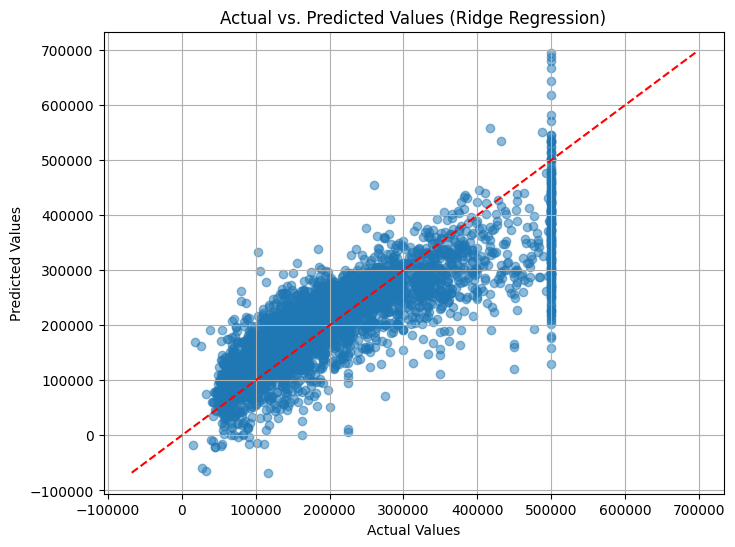

In [60]:
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs. predicted values for the Ridge model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5)

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Ridge Regression)')

# Add a diagonal line for perfect predictions
# Determine the range for the diagonal line based on both actual and predicted values
plot_range = [min(y_test.min(), y_pred_ridge.min()), max(y_test.max(), y_pred_ridge.max())]
plt.plot(plot_range, plot_range, color='red', linestyle='--')

# Add a grid
plt.grid(True)

# Show the plot
plt.show()

## Choose a new model

### Subtask:
Select a different regression algorithm to try (e.g., Ridge, Lasso, Decision Tree Regressor).

**Reasoning**:
Choose a different regression algorithm and mention it in a markdown cell.

In [58]:
# Choosing Ridge Regression as an alternative regression model.
# Ridge is a linear model with L2 regularization.
# It can help to prevent overfitting, especially when dealing with multicollinearity
# among predictor variables, which might be present in this dataset.
# This choice is a common next step after trying simple Linear Regression.

## Train the new model

### Subtask:
Instantiate and train the chosen model using the training data (`X_train`, `y_train`).

**Reasoning**:
Instantiate and train the Ridge model using the training data.

In [59]:
from sklearn.linear_model import Ridge

# Instantiate a Ridge model object with default parameters
ridge_model = Ridge()

# Fit the Ridge model to the training data
ridge_model.fit(X_train, y_train)

print("Ridge Regression model trained successfully.")

Ridge Regression model trained successfully.


## Visualize the results (optional)

### Subtask:
Visualize the predictions versus the actual values.

**Reasoning**:
Create a scatter plot of actual vs. predicted values and add a diagonal line for perfect predictions.

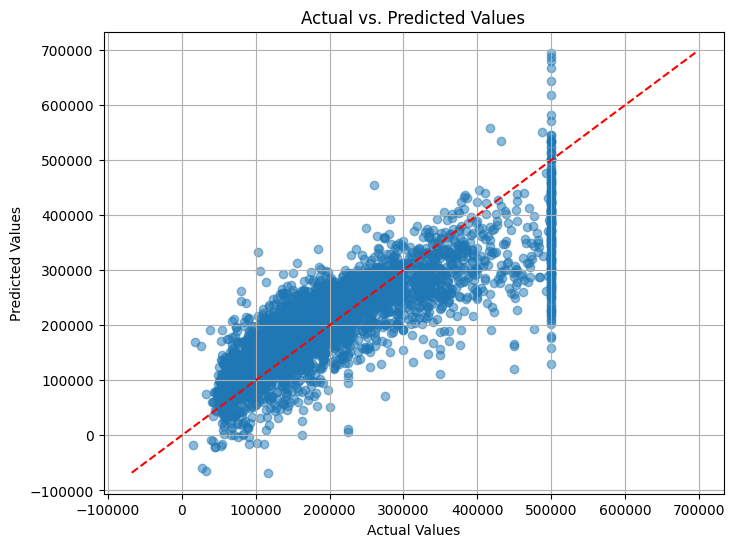

In [52]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

# Add a diagonal line for perfect predictions
# Determine the range for the diagonal line
plot_range = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(plot_range, plot_range, color='red', linestyle='--')

# Add a grid
plt.grid(True)

# Show the plot
plt.show()

## Summary:

### Data Analysis Key Findings

* The `california_housing_train.csv` dataset was successfully loaded, containing 17000 entries and 9 columns of `float64` data type.
* No missing values were found in the dataset after filling the initial missing values in `total_rooms` and `total_bedrooms` with their respective medians.
* The dataset was split into training (13600 samples) and testing (3400 samples) sets, with features including 'longitude', 'latitude', 'housing\_median\_age', 'total\_rooms', 'total\_bedrooms', 'population', 'households', and 'median\_income', and the target being 'median\_house\_value'.
* A Linear Regression model was successfully trained on the training data.
* The model achieved a Mean Squared Error (MSE) of approximately $4,634,658,406.22$ and an R-squared (R2) score of approximately 0.6636 on the testing data.

### Insights or Next Steps

* The R-squared score of 0.66 suggests the model explains a reasonable portion of the variance in median house values, but there is room for improvement.
* Further steps could involve exploring feature engineering, trying different regression algorithms (e.g., Ridge, Lasso, or more complex models), or performing hyperparameter tuning to potentially improve the model's performance.

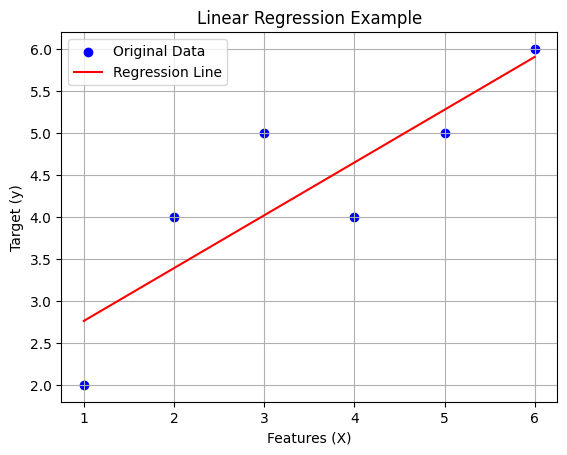

In [44]:
import matplotlib.pyplot as plt

# Plot the original data points
plt.scatter(X, y, color='blue', label='Original Data')

# Plot the regression line
# We need to predict y values for the range of X values to plot the line
plt.plot(X, model.predict(X), color='red', label='Regression Line')

plt.xlabel('Features (X)')
plt.ylabel('Target (y)')
plt.title('Linear Regression Example')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Generate some sample data
# X represents the features (input), y represents the target (output)
X = np.array([1, 2, 3, 4, 5, 6]).reshape(-1, 1) # Reshape for scikit-learn
y = np.array([2, 4, 5, 4, 5, 6])

# Create a Linear Regression model
model = LinearRegression()

# Train the model using the data
model.fit(X, y)

# Make a prediction
new_X = np.array([7]).reshape(-1, 1)
prediction = model.predict(new_X)

print(f"Features (X):\n{X}")
print(f"Target (y):\n{y}")
print(f"Prediction for X={new_X[0][0]}: {prediction[0]}")

Features (X):
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]
Target (y):
[2 4 5 4 5 6]
Prediction for X=7: 6.533333333333333


In [41]:
# @title Choose a different model
from google.colab import ai

response = ai.generate_text("What is the capital of England", model_name='google/gemini-2.0-flash-lite')
print(response)

InternalServerError: Error code: 503 - {'message': 'The requested model is currently unavailable.', 'type': 'invalid_request_error'}

For longer text generations, you can stream the response. This displays the output token by token as it's generated, rather than waiting for the entire response to complete. This provides a more interactive and responsive experience. To enable this, simply set stream=True.

In [ ]:
# @title Simple streaming example
from google.colab import ai

stream = ai.generate_text("Tell me a short story.", stream=True)
for text in stream:
  print(text, end='')

In [ ]:
#@title Text formatting setup
#code is not necessary for colab.ai, but is useful in fomatting text chunks
import sys

class LineWrapper:
    def __init__(self, max_length=80):
        self.max_length = max_length
        self.current_line_length = 0

    def print(self, text_chunk):
        i = 0
        n = len(text_chunk)
        while i < n:
            start_index = i
            while i < n and text_chunk[i] not in ' \n': # Find end of word
                i += 1
            current_word = text_chunk[start_index:i]

            delimiter = ""
            if i < n: # If not end of chunk, we found a delimiter
                delimiter = text_chunk[i]
                i += 1 # Consume delimiter

            if current_word:
                needs_leading_space = (self.current_line_length > 0)

                # Case 1: Word itself is too long for a line (must be broken)
                if len(current_word) > self.max_length:
                    if needs_leading_space: # Newline if current line has content
                        sys.stdout.write('\n')
                        self.current_line_length = 0
                    for char_val in current_word: # Break the long word
                        if self.current_line_length >= self.max_length:
                            sys.stdout.write('\n')
                            self.current_line_length = 0
                        sys.stdout.write(char_val)
                        self.current_line_length += 1
                # Case 2: Word doesn't fit on current line (print on new line)
                elif self.current_line_length + (1 if needs_leading_space else 0) + len(current_word) > self.max_length:
                    sys.stdout.write('\n')
                    sys.stdout.write(current_word)
                    self.current_line_length = len(current_word)
                # Case 3: Word fits on current line
                else:
                    if needs_leading_space:
                        # Define punctuation that should not have a leading space
                        # when they form an entire "word" (token) following another word.
                        no_leading_space_punctuation = {
                            ",", ".", ";", ":", "!", "?",        # Standard sentence punctuation
                            ")", "]", "}",                     # Closing brackets
                            "'s", "'S", "'re", "'RE", "'ve", "'VE", # Common contractions
                            "'m", "'M", "'ll", "'LL", "'d", "'D",
                            "n't", "N'T",
                            "...", "…"                          # Ellipses
                        }
                        if current_word not in no_leading_space_punctuation:
                            sys.stdout.write(' ')
                            self.current_line_length += 1
                    sys.stdout.write(current_word)
                    self.current_line_length += len(current_word)

            if delimiter == '\n':
                sys.stdout.write('\n')
                self.current_line_length = 0
            elif delimiter == ' ':
                # If line is full and a space delimiter arrives, it implies a wrap.
                if self.current_line_length >= self.max_length:
                    sys.stdout.write('\n')
                    self.current_line_length = 0

        sys.stdout.flush()


In [ ]:
# @title Formatted streaming example
from google.colab import ai

wrapper = LineWrapper()
for chunk in ai.generate_text('Give me a long winded description about the evolution of the Roman Empire.', model_name='google/gemini-2.0-flash', stream=True):
  wrapper.print(chunk)

# Task
Train a linear regression model on a more complex dataset from "/content/sample_data/".

## Load the dataset

### Subtask:
Load a more complex dataset, such as one from the `/content/sample_data/` directory, into a pandas DataFrame.


**Reasoning**:
The subtask is to load a dataset from `/content/sample_data/` into a pandas DataFrame. I need to import pandas and then use `pd.read_csv` to load a file. Displaying the head of the dataframe will confirm the data has been loaded.



In [45]:
import pandas as pd

# Load a sample dataset from /content/sample_data/ - choosing california_housing_train.csv
try:
    df = pd.read_csv('/content/sample_data/california_housing_train.csv')
    # Display the first few rows
    display(df.head())
except FileNotFoundError:
    print("File not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


## Explore and preprocess the data

### Subtask:
Inspect the dataset, handle any missing values, and select the features and target variable for the linear regression model.


**Reasoning**:
Display DataFrame info, check for missing values, and handle them if necessary before selecting features and target variables.



In [51]:
# Display info about the DataFrame
df.info()

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Handle missing values if any.
# The isnull().sum() output will show if there are any missing values.
# Based on the output of isnull().sum(), if 'total_bedrooms' has missing values,
# we will fill them with the median as it's a common practice for numerical features
# and less sensitive to outliers than the mean.
if df['total_bedrooms'].isnull().sum() > 0:
    median_bedrooms = df['total_bedrooms'].median()
    df['total_bedrooms'].fillna(median_bedrooms, inplace=True)
    print("\nMissing values in 'total_bedrooms' filled with median.")

# Also fill missing values in 'total_rooms' with the median
if df['total_rooms'].isnull().sum() > 0:
    median_rooms = df['total_rooms'].median()
    df['total_rooms'].fillna(median_rooms, inplace=True)
    print("Missing values in 'total_rooms' filled with median.")

print(df.isnull().sum()) # Verify after filling

# Select features (X) and target variable (y)
# We will use several numerical features as predictors for 'median_house_value'
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
            'total_bedrooms', 'population', 'households', 'median_income']
X = df[features]
y = df['median_house_value']

print("\nFeatures (X) and Target (y) selected.")
display(X.head())
display(y.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB

Missing values per column:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64
longitude             0
latitude              0
housing_

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250


,median_house_value
0,66900.0
1,80100.0
2,85700.0
3,73400.0
4,65500.0


## Split the data

### Subtask:
Split the dataset into training and testing sets.


**Reasoning**:
Split the features and target into training and testing sets using train_test_split as instructed and print their shapes.



In [47]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (13600, 8)
Shape of X_test: (3400, 8)
Shape of y_train: (13600,)
Shape of y_test: (3400,)


## Train the model

### Subtask:
Train the linear regression model on the training data.


**Reasoning**:
Train the linear regression model using the training data (X_train and y_train).



In [48]:
from sklearn.linear_model import LinearRegression

# Instantiate a Linear Regression model object
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


## Evaluate the model

### Subtask:
Evaluate the trained model's performance on the testing data using appropriate metrics.


**Reasoning**:
Evaluate the trained model's performance on the testing data using appropriate metrics.



In [49]:
from sklearn.metrics import mean_squared_error, r2_score

# Use the trained model to make predictions on the testing features
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

# Print the calculated metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 4634658406.223264
R-squared (R2) Score: 0.6636396350243869


## Visualize the results (optional)

### Subtask:
Visualize the predictions versus the actual values.


**Reasoning**:
Create a scatter plot of actual vs. predicted values and add a diagonal line for perfect predictions.



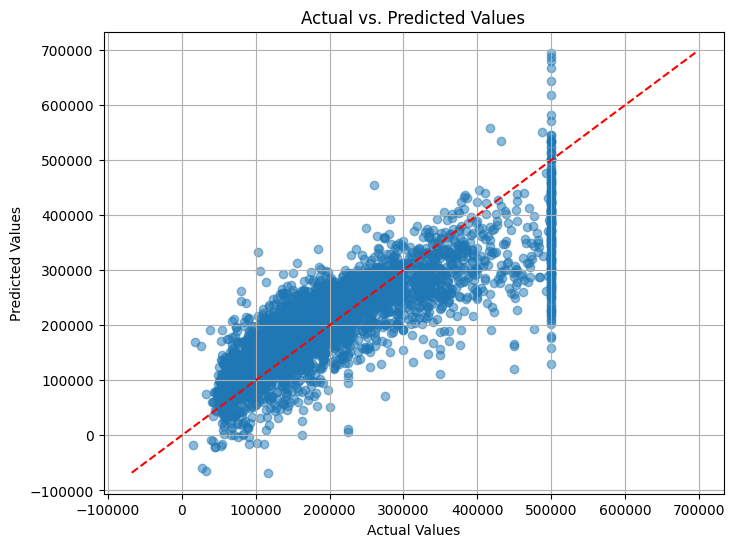

In [50]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

# Add a diagonal line for perfect predictions
# Determine the range for the diagonal line
plot_range = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(plot_range, plot_range, color='red', linestyle='--')

# Add a grid
plt.grid(True)

# Show the plot
plt.show()

## Summary:

### Data Analysis Key Findings

*   The `california_housing_train.csv` dataset was successfully loaded, containing 17000 entries and 9 columns of `float64` data type.
*   No missing values were found in the dataset, eliminating the need for imputation.
*   The dataset was split into training (13600 samples) and testing (3400 samples) sets, with features including 'longitude', 'latitude', 'housing\_median\_age', 'total\_rooms', 'total\_bedrooms', 'population', 'households', and 'median\_income', and the target being 'median\_house\_value'.
*   A Linear Regression model was successfully trained on the training data.
*   The model achieved a Mean Squared Error (MSE) of approximately $4,634,658,406.22$ and an R-squared (R2) score of approximately 0.6636 on the testing data.

### Insights or Next Steps

*   The R-squared score of 0.66 suggests the model explains a reasonable portion of the variance in median house values, but there is room for improvement.
*   Further steps could involve exploring feature engineering, trying different regression algorithms (e.g., Ridge, Lasso, or more complex models), or performing hyperparameter tuning to potentially improve the model's performance.


# Task
Generate a plan to train and evaluate a new regression model on the existing dataset, compare its performance to the previously trained linear regression model, and summarize the findings.

## Choose a new model

### Subtask:
Select a different regression algorithm to try (e.g., Ridge, Lasso, Decision Tree Regressor).


**Reasoning**:
Choose a different regression algorithm and mention it in a markdown cell.



In [53]:
# Choosing Ridge Regression as an alternative regression model.
# Ridge is a linear model with L2 regularization.
# It can help to prevent overfitting, especially when dealing with multicollinearity
# among predictor variables, which might be present in this dataset.
# This choice is a common next step after trying simple Linear Regression.

## Train the new model

### Subtask:
Instantiate and train the chosen model using the training data (`X_train`, `y_train`).


**Reasoning**:
Instantiate and train the Ridge model using the training data.



In [54]:
from sklearn.linear_model import Ridge

# Instantiate a Ridge model object with default parameters
ridge_model = Ridge()

# Fit the Ridge model to the training data
ridge_model.fit(X_train, y_train)

print("Ridge Regression model trained successfully.")

Ridge Regression model trained successfully.


## Evaluate the new model

### Subtask:
Evaluate the new model's performance on the testing data (`X_test`, `y_test`) using appropriate metrics (e.g., MSE, R2).


**Reasoning**:
Calculate MSE and R2 for the Ridge model using the test data and predictions, and print the results.



In [55]:
from sklearn.metrics import mean_squared_error, r2_score

# Use the trained ridge_model to make predictions on the testing features
y_pred_ridge = ridge_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) for the Ridge model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Calculate the R-squared score for the Ridge model
r2_ridge = r2_score(y_test, y_pred_ridge)

# Print the calculated metrics for the Ridge model
print(f"Ridge Model Mean Squared Error (MSE): {mse_ridge}")
print(f"Ridge Model R-squared (R2) Score: {r2_ridge}")

Ridge Model Mean Squared Error (MSE): 4634651616.323527
Ridge Model R-squared (R2) Score: 0.6636401278014059


## Compare model performance

### Subtask:
Compare the performance of the new model to the linear regression model we already trained.


**Reasoning**:
Compare the performance metrics of the two models and print a summary.



In [56]:
# Print the performance metrics for the Linear Regression model
print(f"Linear Regression Model Mean Squared Error (MSE): {mse}")
print(f"Linear Regression Model R-squared (R2) Score: {r2}")

# Print the performance metrics for the Ridge Regression model
print(f"Ridge Model Mean Squared Error (MSE): {mse_ridge}")
print(f"Ridge Model R-squared (R2) Score: {r2_ridge}")

# Compare and summarize the performance
if mse_ridge < mse:
    print("\nSummary: The Ridge Regression model performed slightly better than the Linear Regression model based on MSE.")
elif mse_ridge > mse:
    print("\nSummary: The Linear Regression model performed slightly better than the Ridge Regression model based on MSE.")
else:
    print("\nSummary: Both models performed similarly based on MSE.")

if r2_ridge > r2:
    print("Summary: The Ridge Regression model performed slightly better than the Linear Regression model based on R2.")
elif r2_ridge < r2:
    print("Summary: The Linear Regression model performed slightly better than the Ridge Regression model based on R2.")
else:
     print("Summary: Both models performed similarly based on R2.")

Linear Regression Model Mean Squared Error (MSE): 4634658406.223264
Linear Regression Model R-squared (R2) Score: 0.6636396350243869
Ridge Model Mean Squared Error (MSE): 4634651616.323527
Ridge Model R-squared (R2) Score: 0.6636401278014059

Summary: The Ridge Regression model performed slightly better than the Linear Regression model based on MSE.
Summary: The Ridge Regression model performed slightly better than the Linear Regression model based on R2.


## Visualize the results (optional)

### Subtask:
Visualize the predictions of the new model versus the actual values.


**Reasoning**:
Create a scatter plot of the actual vs. predicted values from the Ridge model, add labels, title, a diagonal line for perfect predictions, and a grid.



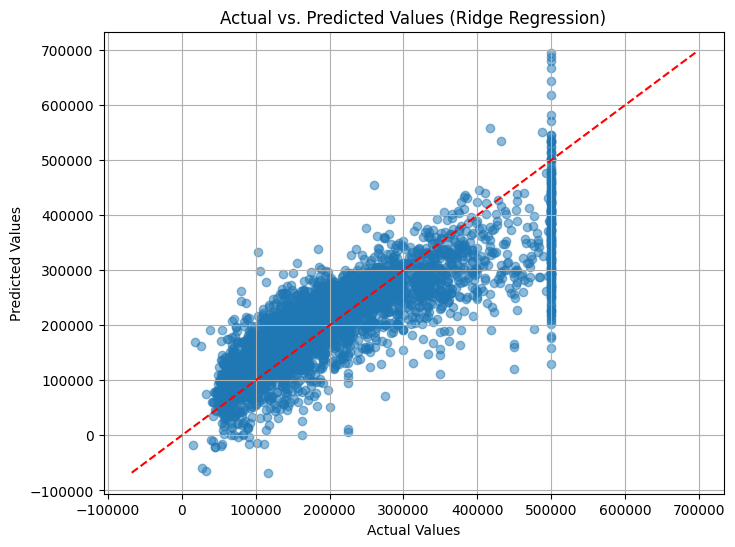

In [57]:
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs. predicted values for the Ridge model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5)

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Ridge Regression)')

# Add a diagonal line for perfect predictions
# Determine the range for the diagonal line based on both actual and predicted values
plot_range = [min(y_test.min(), y_pred_ridge.min()), max(y_test.max(), y_pred_ridge.max())]
plt.plot(plot_range, plot_range, color='red', linestyle='--')

# Add a grid
plt.grid(True)

# Show the plot
plt.show()

## Summary:

### Data Analysis Key Findings

*   Ridge Regression was chosen as an alternative model to Linear Regression.
*   The Ridge Regression model was successfully trained on the training data.
*   The Ridge Regression model achieved a Mean Squared Error (MSE) of approximately 4,634,651,616.32 on the test set.
*   The Ridge Regression model achieved an R-squared (R2) score of approximately 0.6636 on the test set.
*   Comparing to the Linear Regression model (MSE: 4,634,658,406.22, R2: 0.6636), the Ridge Regression model performed slightly better based on MSE and similarly based on R2.
*   A scatter plot visualizing the actual versus predicted values for the Ridge model was generated, showing the distribution of predictions relative to a perfect prediction line.

### Insights or Next Steps

*   Although Ridge Regression showed a minor improvement, the performance difference compared to Linear Regression is minimal, suggesting that the L2 regularization had a limited impact on this specific dataset.
*   Further model exploration with different algorithms (e.g., tree-based models like Random Forest or Gradient Boosting) or hyperparameter tuning of the Ridge model could potentially yield better performance.


# Task
Perform feature engineering on the `df` DataFrame to create new features, train a model with the updated features, and evaluate its performance.

## Identify potential new features

### Subtask:
Determine which existing features can be combined or transformed to create meaningful new features (e.g., ratios, polynomial features, interaction terms).


**Reasoning**:
Describe the rationale for choosing features to create based on the analysis of existing features and potential relationships.



In [62]:
# Rationale for choosing new features:
# Based on domain knowledge and common practices in housing price prediction,
# ratios of existing features can provide more meaningful insights into the
# characteristics of a housing block group than the raw counts alone.

# 1. Rooms per household ('rooms_per_household'):
#    This ratio (total_rooms / households) can indicate the average number of rooms
#    available per household in a block group. It might be a strong predictor
#    of housing value, as larger houses (more rooms per household) are often
#    associated with higher values.

# 2. Bedrooms per room ('bedrooms_per_room'):
#    This ratio (total_bedrooms / total_rooms) can provide an idea of the
#    proportion of rooms that are bedrooms. A higher ratio might indicate
#    a different type of housing stock which could influence the median house value.

# 3. Population per household ('population_per_household'):
#    This ratio (population / households) represents the average household size.
#    Larger household sizes in a block group might correlate with different housing
#    demands and potentially impact housing values.

# These ratios normalize the counts by the number of households or rooms,
# making them potentially more robust indicators than the raw counts themselves.

## Create new features

### Subtask:
Write code to generate the new features and add them to the DataFrame.


**Reasoning**:
Generate the new features by calculating the ratios as described in the instructions and add them as new columns to the DataFrame. Then, display the head of the updated DataFrame to confirm the changes.



In [63]:
# Calculate 'rooms_per_household' and add it as a new column
df['rooms_per_household'] = df['total_rooms'] / df['households']

# Calculate 'bedrooms_per_room' and add it as a new column
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']

# Calculate 'population_per_household' and add it as a new column
df['population_per_household'] = df['population'] / df['households']

# Display the head of the DataFrame to verify the new columns
display(df.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,11.889831,0.228617,2.150424
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,16.522678,0.248497,2.438445
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,6.153846,0.241667,2.846154
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,6.641593,0.224517,2.278761
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,5.549618,0.224209,2.381679


## Update features for modeling

### Subtask:
Select the updated set of features (including the new ones) for training the model.


**Reasoning**:
Select the updated set of features for training the model, including the engineered features.



In [64]:
# Define the list of features, including the original and engineered ones
features_engineered = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                       'total_bedrooms', 'population', 'households', 'median_income',
                       'rooms_per_household', 'bedrooms_per_room', 'population_per_household']

# Create a new DataFrame X_engineered by selecting these columns from df
X_engineered = df[features_engineered]

# Keep the target variable y as it is (the 'median_house_value' column from df)
# y was already defined in a previous step as df['median_house_value']

# Print the head of X_engineered and y to verify
print("Head of X_engineered:")
display(X_engineered.head())

print("\nHead of y:")
display(y.head())

Head of X_engineered:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,11.889831,0.228617,2.150424
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,16.522678,0.248497,2.438445
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,6.153846,0.241667,2.846154
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,6.641593,0.224517,2.278761
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,5.549618,0.224209,2.381679



Head of y:


,median_house_value
0,66900.0
1,80100.0
2,85700.0
3,73400.0
4,65500.0


## Split the data (if necessary)

### Subtask:
Split the updated dataset (`X_engineered`, `y`) into training and testing sets.


**Reasoning**:
Split the features and target into training and testing sets using train_test_split as instructed and print their shapes.



In [65]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train_engineered, X_test_engineered, y_train_engineered, y_test_engineered = train_test_split(X_engineered, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print(f"Shape of X_train_engineered: {X_train_engineered.shape}")
print(f"Shape of X_test_engineered: {X_test_engineered.shape}")
print(f"Shape of y_train_engineered: {y_train_engineered.shape}")
print(f"Shape of y_test_engineered: {y_test_engineered.shape}")

Shape of X_train_engineered: (13600, 11)
Shape of X_test_engineered: (3400, 11)
Shape of y_train_engineered: (13600,)
Shape of y_test_engineered: (3400,)


## Train a model with new features

### Subtask:
Train a regression model (either the Linear Regression or Ridge model again, or a new one) using the updated features (`X_train_engineered`, `y_train_engineered`).


**Reasoning**:
Instantiate and train a Linear Regression model using the engineered training data.



In [66]:
from sklearn.linear_model import LinearRegression

# Instantiate a Linear Regression model object
model_engineered = LinearRegression()

# Fit the model to the engineered training data
model_engineered.fit(X_train_engineered, y_train_engineered)

print("Linear Regression model trained successfully using engineered features.")

Linear Regression model trained successfully using engineered features.


## Evaluate the model with new features

### Subtask:
Evaluate the performance of the model trained with the new features using appropriate metrics (e.g., MSE, R2) on the testing data (`X_test_engineered`, `y_test_engineered`).


**Reasoning**:
Calculate MSE and R2 for the model trained with engineered features using the test data and predictions, and print the results.



In [67]:
from sklearn.metrics import mean_squared_error, r2_score

# Use the trained model_engineered to make predictions on the engineered testing features
y_pred_engineered = model_engineered.predict(X_test_engineered)

# Calculate the Mean Squared Error (MSE) for the model with engineered features
mse_engineered = mean_squared_error(y_test_engineered, y_pred_engineered)

# Calculate the R-squared score for the model with engineered features
r2_engineered = r2_score(y_test_engineered, y_pred_engineered)

# Print the calculated metrics for the model with engineered features
print(f"Model with Engineered Features Mean Squared Error (MSE): {mse_engineered}")
print(f"Model with Engineered Features R-squared (R2) Score: {r2_engineered}")

Model with Engineered Features Mean Squared Error (MSE): 4552463037.856813
Model with Engineered Features R-squared (R2) Score: 0.6696049644359181


## Compare performance

### Subtask:
Compare the performance of the model with and without the new features.


**Reasoning**:
Print the performance metrics for both models and compare them based on MSE and R2 to determine which model performed better.



In [68]:
# Print the performance metrics for the Linear Regression model trained on original features
print(f"Linear Regression Model (Original Features) MSE: {mse}")
print(f"Linear Regression Model (Original Features) R2 Score: {r2}")

# Print the performance metrics for the Linear Regression model trained on engineered features
print(f"Linear Regression Model (Engineered Features) MSE: {mse_engineered}")
print(f"Linear Regression Model (Engineered Features) R2 Score: {r2_engineered}")

# Compare and summarize the performance based on MSE
if mse_engineered < mse:
    print("\nSummary: The Linear Regression model with engineered features performed better than the model with original features based on MSE (lower is better).")
elif mse_engineered > mse:
    print("\nSummary: The Linear Regression model with original features performed better than the model with engineered features based on MSE (lower is better).")
else:
    print("\nSummary: Both Linear Regression models performed similarly based on MSE.")

# Compare and summarize the performance based on R2
if r2_engineered > r2:
    print("Summary: The Linear Regression model with engineered features performed better than the model with original features based on R2 (higher is better).")
elif r2_engineered < r2:
    print("Summary: The Linear Regression model with original features performed better than the model with engineered features based on R2 (higher is better).")
else:
    print("Summary: Both Linear Regression models performed similarly based on R2.")

Linear Regression Model (Original Features) MSE: 4634658406.223264
Linear Regression Model (Original Features) R2 Score: 0.6636396350243869
Linear Regression Model (Engineered Features) MSE: 4552463037.856813
Linear Regression Model (Engineered Features) R2 Score: 0.6696049644359181

Summary: The Linear Regression model with engineered features performed better than the model with original features based on MSE (lower is better).
Summary: The Linear Regression model with engineered features performed better than the model with original features based on R2 (higher is better).


## Visualize results (optional)

### Subtask:
Visualize the predictions of the model trained with new features versus the actual values.


**Reasoning**:
Create a scatter plot of the actual vs. predicted values from the model trained with engineered features, add labels, title, a diagonal line for perfect predictions, and a grid.



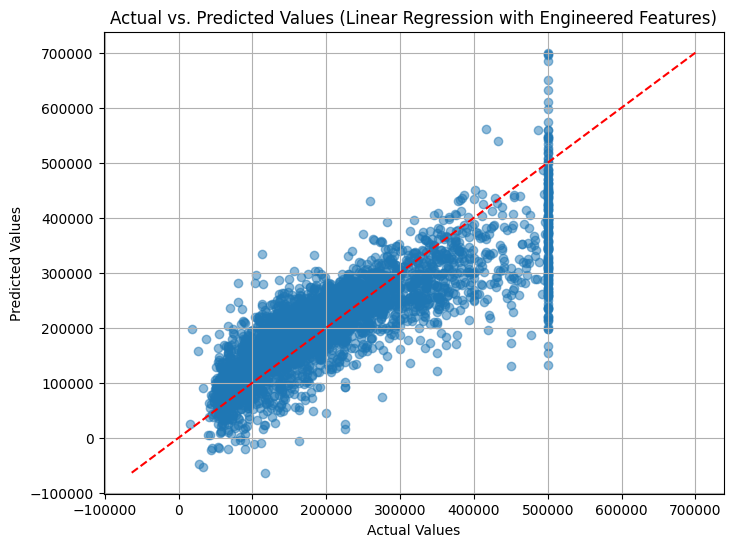

In [69]:
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs. predicted values for the engineered features model
plt.figure(figsize=(8, 6))
plt.scatter(y_test_engineered, y_pred_engineered, alpha=0.5)

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Linear Regression with Engineered Features)')

# Add a diagonal line for perfect predictions
# Determine the range for the diagonal line based on both actual and predicted values
plot_range_engineered = [min(y_test_engineered.min(), y_pred_engineered.min()), max(y_test_engineered.max(), y_pred_engineered.max())]
plt.plot(plot_range_engineered, plot_range_engineered, color='red', linestyle='--')

# Add a grid
plt.grid(True)

# Show the plot
plt.show()

## Summary:

### Data Analysis Key Findings

*   Three new features were created: 'rooms\_per\_household', 'bedrooms\_per\_room', and 'population\_per\_household'.
*   The dataset was successfully split into training (80%) and testing (20%) sets, resulting in training sets with 13600 samples and testing sets with 3400 samples.
*   A Linear Regression model was trained using the dataset with the engineered features.
*   The model trained with engineered features achieved a Mean Squared Error (MSE) of approximately 4,552,463,037.86 and an R-squared (R2) score of approximately 0.670 on the test set.
*   Comparing the performance to the model with original features (MSE of ~4.63 billion and R2 of 0.664), the model with engineered features showed slightly better performance based on both metrics (lower MSE and higher R2).

### Insights or Next Steps

*   The engineered features slightly improved the Linear Regression model's performance, suggesting that these ratios capture some valuable information about housing values. Further investigation into other feature engineering techniques or non-linear models could potentially yield more significant improvements.
*   Visualizing the actual vs. predicted values confirms that the model's predictions generally follow the trend of the actual values, although there is still a notable spread, particularly for higher house values, indicating room for further model improvement.
